In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Filters

In [2]:
# Sobel x-axis kernel
SOBEL_X = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int32")

# Sobel y-axis kernel
SOBEL_Y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int32")

# Gaussian kernel
GAUSS = np.array((
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]), dtype="float64")

# Zero Padding

In [3]:
#Zero padding of numpy array
def zero_padding(img, kernel):
    m, n = img.shape[0], img.shape[1]
    p, q = kernel.shape[0] // 2, kernel.shape[1] // 2
    pad = ((p, p), (q, q))
    padded_img = np.pad(img, pad, mode='constant', constant_values=0)
    return padded_img

# Convolution

In [4]:
def convolution(img, kernel):
    m, n = img.shape[0], img.shape[1]
    p, q = kernel.shape[0] // 2, kernel.shape[1]//2
    
    padded_img = zero_padding(img, kernel)
    
    P = np.empty(img.shape, dtype=np.float64)
            
    for i in np.arange(p, m+p):
        for j in np.arange(q, n+q):
            roi = padded_img[i - p:i + p + 1, j - q:j + q + 1]
            P[i - p, j - q] = (roi*kernel).sum()
    return P

In [5]:
def convolve(img, kernel):
    result_img = convolution(img, kernel)
    
    if (result_img.dtype == np.float64):
        kernel = kernel / 255.0
        kernel = (kernel*255).astype(np.uint8)
    else:
        result_img = result_img + abs(np.amin(g))
        result_img = result_img / np.amax(g)
        result_img = (result_img*255.0)
        
    return result_img

# Add noise

In [6]:
def noisy_image(img, noise_factor, mean, std_dev):
    new = img + noise_factor * np.random.normal(mean, std_dev, img.shape)
    return new

# Calculate Magnitute

In [7]:
def magnitute(x, y):
    return np.sqrt(x ** 2 + y ** 2)

# Normalize

In [8]:
def normalize(img):   
    M = np.empty(img.shape, dtype=np.float64)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            M[i,j] = ((img[i,j] - img.min())/(img.max() - img.min()))*255
    return M

# Histogram

In [9]:
def Hist(x):  
    k = 0
    B = 0
    for i in range(x.shape[0]):
        k += x[i]
        if k/x.sum() >= 0.5:
            B = i+1
            break
    return B

In [18]:
def getB(img):
    P = convolve(img, SOBEL_X)
    Q = convolve(img, SOBEL_Y)
    M = magnitute(P, Q)
    
    plt.title('Magnitute of Image')
    plt.axis('off')
    plt.imshow(M)
    
    M = normalize(M)
    
    fig, ax = plt.subplots(figsize =(40, 7)) 
    plt.title('histogram')
    hist_fq, _, _ = ax.hist(M.reshape(img.shape[0]*img.shape[1]), bins = [i for i in range(1+int(M.max()))])
    
    B = Hist(hist_fq)
    return B

# Required functions for Anisotropic Diffusion

In [19]:
def g(x, B):
    return np.exp(-(x / B) ** 2)

In [20]:
def pixel(I, i, j, B, lamda):
    delta_N = I[i - 1][j] - I[i][j]
    delta_S = I[i + 1][j] - I[i][j]
    delta_E = I[i][j + 1] - I[i][j]
    delta_W = I[i][j - 1] - I[i][j]
    
    CN = g(delta_N, B)
    CS = g(delta_S, B)
    CE = g(delta_E, B)
    CW = g(delta_W, B)
    
    out = I[i][j] + lamda * (CN * delta_N + CS * delta_S + CE * delta_E + CW * delta_W)
    return out

# Anisotropic Diffusion Function

In [21]:
def AnisotropicDiffusion(image, itr):
    B = getB(image)
    A = np.zeros((image.shape[0]+2, image.shape[1]+2), dtype=np.float64)

    for i in range(1,A.shape[0]-1):
        for j in range(1,A.shape[1]-1):
            A[i,j] = image[i-1,j-1]

    A2 = np.zeros(image.shape, dtype=np.float64)

    for i in range(1,A.shape[0]-1):
        for j in range(1,A.shape[1]-1):
            A2[i-1,j-1] = pixel(A, i, j, B, lamda = 0.2)
            
    Image_List.append(A2)
    
    if itr>1:
        A2 = AnisotropicDiffusion(A2, itr-1)

    return A2

# Main Function

In [22]:
img = cv2.imread('D:\ASSIGNMENT\CV\Assignment 1\cat.jpg', cv2.IMREAD_GRAYSCALE)

In [23]:
img_noisy = noisy_image(img, noise_factor = 1, mean = 0, std_dev = 10)

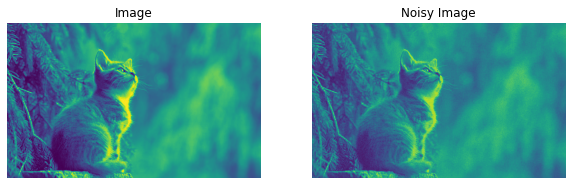

In [24]:
fig = plt.figure(figsize=(10, 9))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(img_noisy)
plt.axis('off')
plt.title("Noisy Image")

plt.show()

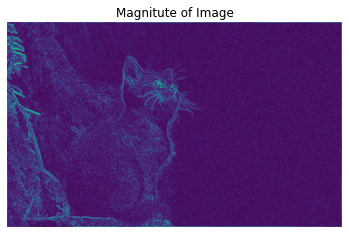

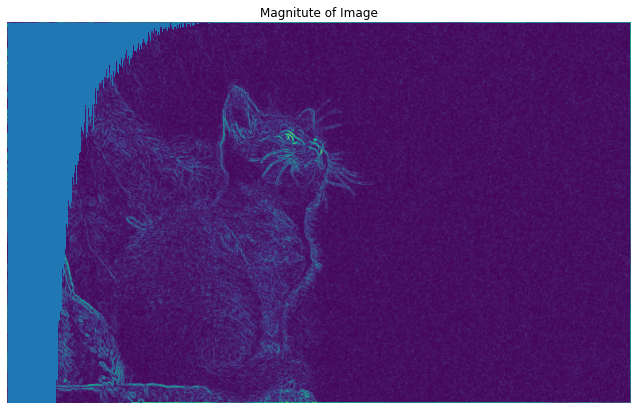

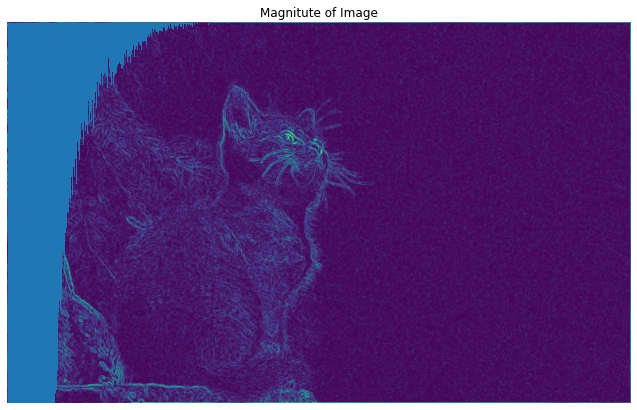

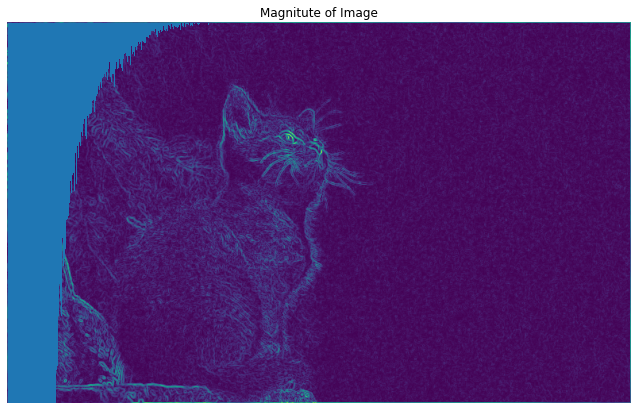

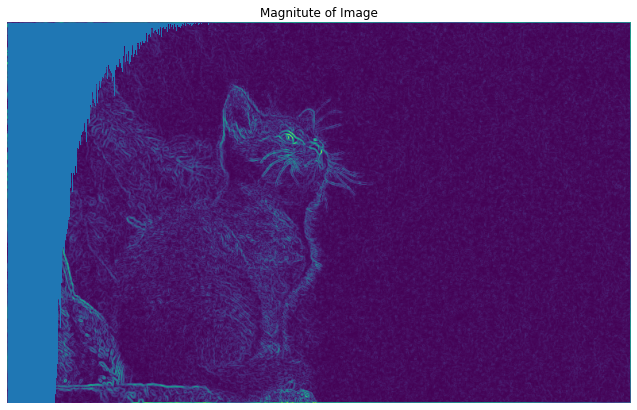

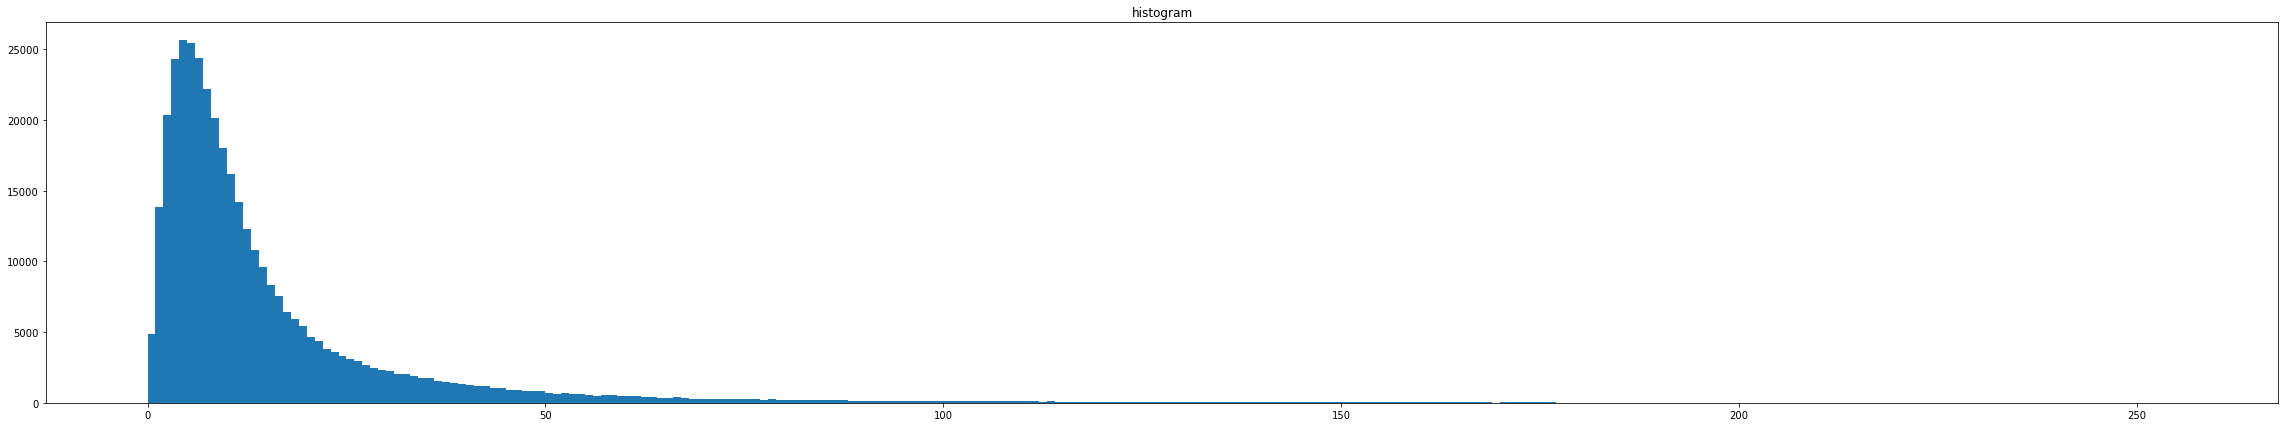

In [25]:
Image_List = []
itr = 5
As = AnisotropicDiffusion(img_noisy, itr)

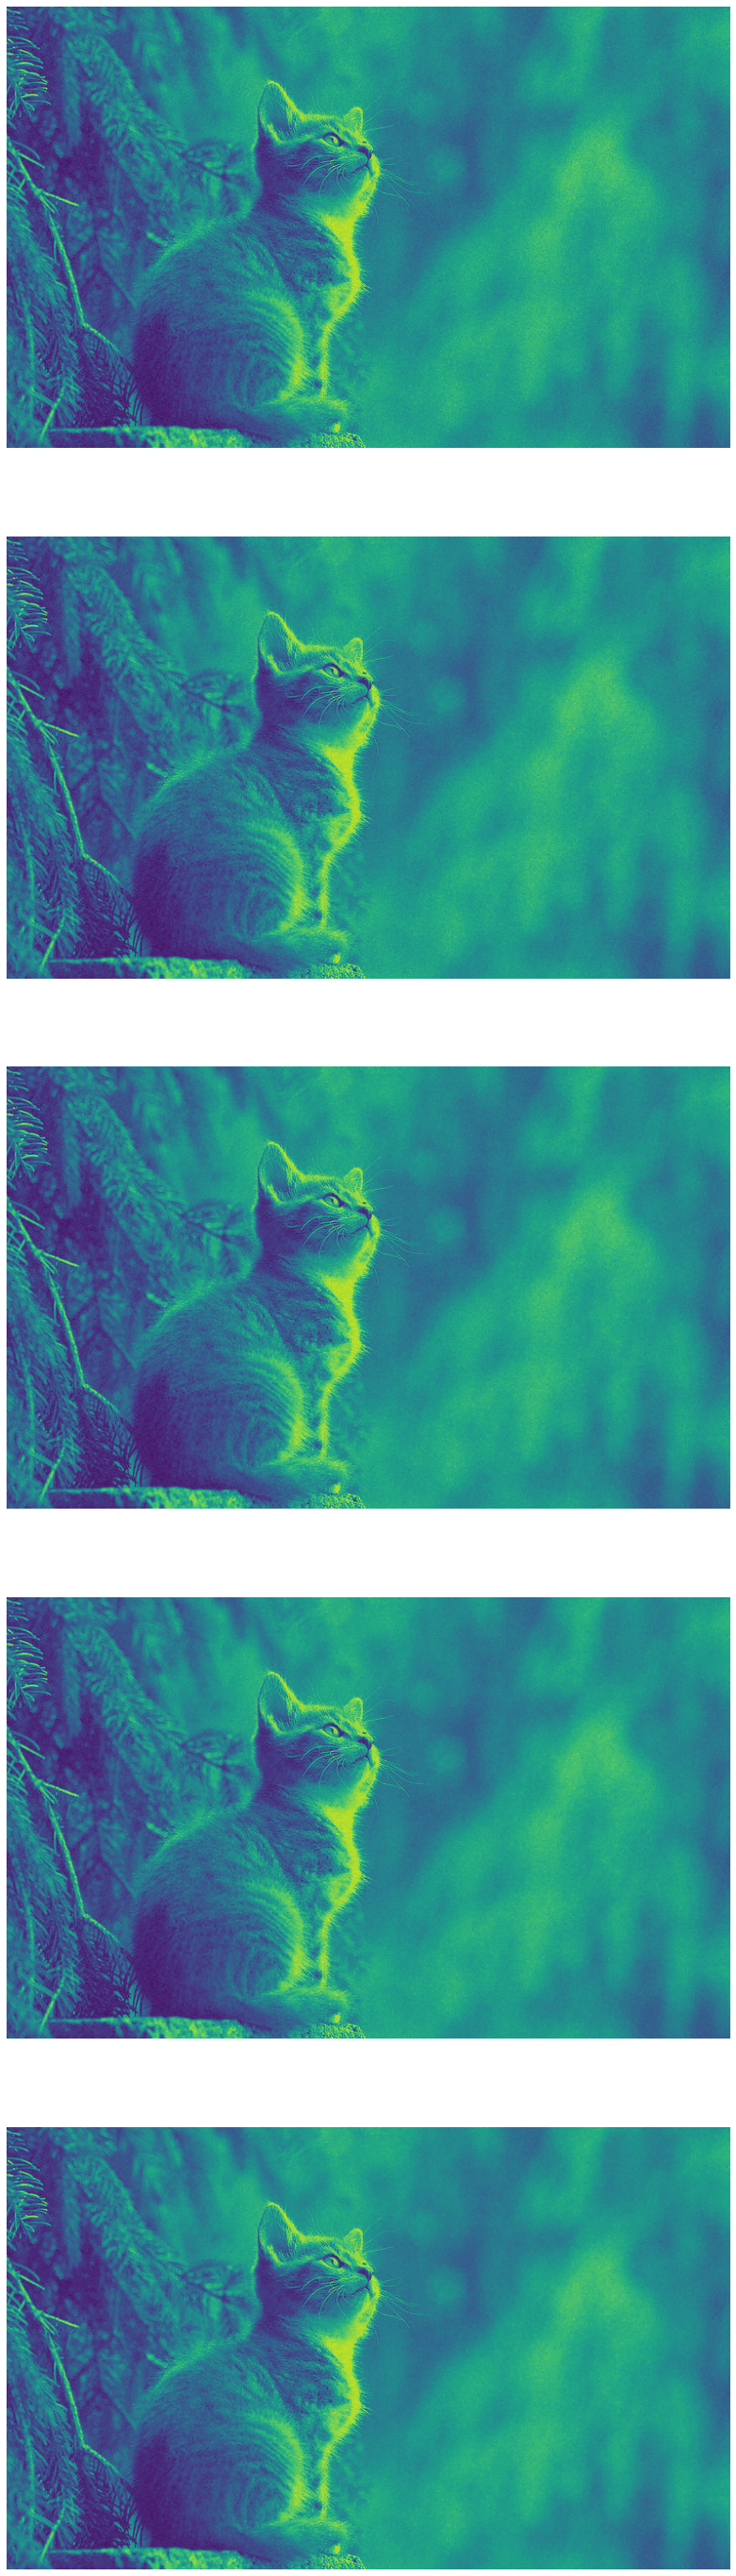

In [26]:
if len(Image_List)==1:
    f, ax = plt.subplots(len(Image_List), figsize =(10,10))
    ax.axis('off')
    ax.imshow(Image_List[0])
else:
    f, ax = plt.subplots(len(Image_List), figsize =(50,50))
    
    for i in range(len(Image_List)):
        ax[i].axis('off')
        ax[i].imshow(Image_List[i])

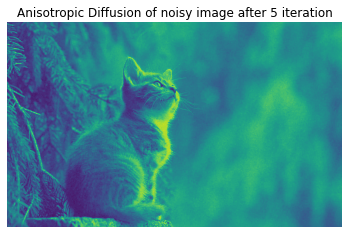

In [27]:
plt.imshow(As)
plt.axis('off')
plt.title("Anisotropic Diffusion of noisy image after "+ str(itr)+ " iteration")
plt.show()